# Introduction to APIs


### APIs

An Application Programming Interface, or API, is a structured way to retrieve data from a website. An advantage of using APIs over, for example, downloading csv files, is that an API response will come in a structured, predictable format. There are many APIs available, including
- Government organizations ([US Government](https://www.data.gov/developers/apis))
- Large companies ([X API](https://developer.x.com/en/docs))
- News organizations ([NYT API](https://developer.nytimes.com/))
- And [many more](https://github.com/public-apis/public-apis)

If you type `how to use an api in python` in google, you get back many articles walking through how to use an API. It is a well documented and useful tool to be familiar with.

We'll be interacting with APIs using HTTP requests. HTTP, or **Hypertext Transfer Protocol** is the foundation for data communication on the world wide web.

It functions as a request/response protocol. The client submits a request to the server and the server returns a response message, which includes a status code indicating success or failure of the request. When navigating the web, your web browser is using HTTP requests to fetch the contents of the websites you are browsing.

To send HTTP requests, we will be using the [_requests_](https://requests.readthedocs.io/en/master/) library.

In [1]:
import requests
import matplotlib.pyplot as plt

## Basic API Usage

Let's start by using the [Star Wars API](https://swapi.dev/documentation), an API which provides information about people and places in the Star Wars Universe.

With any API, you should start by inspecting the documentation

We will be using the `requests` package to make a `GET` request to an API. GET is used to request data from a specified resource.

When using an API, the first thing we need to know is the expected URL structure.

In [2]:
endpoint = 'http://swapi.dev/api/planets/1'

response = requests.get(endpoint)

Let's check the response. If all is well, we should have a 200 response.

In [3]:
response

<Response [200]>

To access the content of the response, we can look at the `text` attribute.

In [4]:
response.text

'{"name":"Tatooine","rotation_period":"23","orbital_period":"304","diameter":"10465","climate":"arid","gravity":"1 standard","terrain":"desert","surface_water":"1","population":"200000","residents":["https://swapi.dev/api/people/1/","https://swapi.dev/api/people/2/","https://swapi.dev/api/people/4/","https://swapi.dev/api/people/6/","https://swapi.dev/api/people/7/","https://swapi.dev/api/people/8/","https://swapi.dev/api/people/9/","https://swapi.dev/api/people/11/","https://swapi.dev/api/people/43/","https://swapi.dev/api/people/62/"],"films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/3/","https://swapi.dev/api/films/4/","https://swapi.dev/api/films/5/","https://swapi.dev/api/films/6/"],"created":"2014-12-09T13:50:49.641000Z","edited":"2014-12-20T20:58:18.411000Z","url":"https://swapi.dev/api/planets/1/"}'

For demonstration purposes, let's see what happens when we send an invalid request.

In [5]:
endpoint = 'http://swapi.dev/api/planet/'
response = requests.get(endpoint)
response

<Response [404]>

What if we want to be able to easily change the number that we want to retrieve. For this, we can make use of an f-string. 

In [6]:
planet_number = 1

endpoint = f'http://swapi.dev/api/planets/{planet_number}'

response = requests.get(endpoint)

response.text

'{"name":"Tatooine","rotation_period":"23","orbital_period":"304","diameter":"10465","climate":"arid","gravity":"1 standard","terrain":"desert","surface_water":"1","population":"200000","residents":["https://swapi.dev/api/people/1/","https://swapi.dev/api/people/2/","https://swapi.dev/api/people/4/","https://swapi.dev/api/people/6/","https://swapi.dev/api/people/7/","https://swapi.dev/api/people/8/","https://swapi.dev/api/people/9/","https://swapi.dev/api/people/11/","https://swapi.dev/api/people/43/","https://swapi.dev/api/people/62/"],"films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/3/","https://swapi.dev/api/films/4/","https://swapi.dev/api/films/5/","https://swapi.dev/api/films/6/"],"created":"2014-12-09T13:50:49.641000Z","edited":"2014-12-20T20:58:18.411000Z","url":"https://swapi.dev/api/planets/1/"}'

However, it will be easier to work with as a json. We can use the `json` method to convert the results to a dictionary.

In [7]:
res = response.json()
res

{'name': 'Tatooine',
 'rotation_period': '23',
 'orbital_period': '304',
 'diameter': '10465',
 'climate': 'arid',
 'gravity': '1 standard',
 'terrain': 'desert',
 'surface_water': '1',
 'population': '200000',
 'residents': ['https://swapi.dev/api/people/1/',
  'https://swapi.dev/api/people/2/',
  'https://swapi.dev/api/people/4/',
  'https://swapi.dev/api/people/6/',
  'https://swapi.dev/api/people/7/',
  'https://swapi.dev/api/people/8/',
  'https://swapi.dev/api/people/9/',
  'https://swapi.dev/api/people/11/',
  'https://swapi.dev/api/people/43/',
  'https://swapi.dev/api/people/62/'],
 'films': ['https://swapi.dev/api/films/1/',
  'https://swapi.dev/api/films/3/',
  'https://swapi.dev/api/films/4/',
  'https://swapi.dev/api/films/5/',
  'https://swapi.dev/api/films/6/'],
 'created': '2014-12-09T13:50:49.641000Z',
 'edited': '2014-12-20T20:58:18.411000Z',
 'url': 'https://swapi.dev/api/planets/1/'}

Then, we can access the individual elements by passing in the correct key.

In [8]:
res['name']

'Tatooine'

Finally, notice that we can also search. We can do this manually:

In [9]:
endpoint = 'http://swapi.dev/api/planets/?search=hoth'

response = requests.get(endpoint)

response.json()

{'count': 1,
 'next': None,
 'previous': None,
 'results': [{'name': 'Hoth',
   'rotation_period': '23',
   'orbital_period': '549',
   'diameter': '7200',
   'climate': 'frozen',
   'gravity': '1.1 standard',
   'terrain': 'tundra, ice caves, mountain ranges',
   'surface_water': '100',
   'population': 'unknown',
   'residents': [],
   'films': ['https://swapi.dev/api/films/2/'],
   'created': '2014-12-10T11:39:13.934000Z',
   'edited': '2014-12-20T20:58:18.423000Z',
   'url': 'https://swapi.dev/api/planets/4/'}]}

Or we can do it by supplying a params dictionary.

#### Parameters

Parameters are specific to each API and indicate what information you want back. These can be compared to the various ways you slice a table or df to get just the subset you want. Some parameters are required, others are optional. Always look at the documentation to know what parameters you should include and what are possible values for each one. When using parameters for an API call, you can do the following:

1. Make an empty dictionary for the `params` variable
2. Look at the documentation to know what parameters you should include, add these as **keys** to the dictionary
3. Add the appropriate values for each parameter as the **values** for the dictionary

In [10]:
endpoint = 'http://swapi.dev/api/planets/'

params = {
    'search': 'hoth'
}

response = requests.get(endpoint, params=params)

response.json()

{'count': 1,
 'next': None,
 'previous': None,
 'results': [{'name': 'Hoth',
   'rotation_period': '23',
   'orbital_period': '549',
   'diameter': '7200',
   'climate': 'frozen',
   'gravity': '1.1 standard',
   'terrain': 'tundra, ice caves, mountain ranges',
   'surface_water': '100',
   'population': 'unknown',
   'residents': [],
   'films': ['https://swapi.dev/api/films/2/'],
   'created': '2014-12-10T11:39:13.934000Z',
   'edited': '2014-12-20T20:58:18.423000Z',
   'url': 'https://swapi.dev/api/planets/4/'}]}

### NASA API and API Keys

Now, let's work with the NASA API: https://api.nasa.gov/

One of the main ways APIs maintain security is by the use of some form of authentication, such as an API key. An API key can be obtained in a number of ways, depending on the API, and is a way for the application to know who you are and provides you secure access to the data.

To work with the NASA API, you'll need to create an API key.

1. Scroll down and enter your First Name, Last Name, and email to generate an API key
2. Copy the API key into the keys.json file.

**DO NOT SHARE YOUR API KEYS OR PUT THEM IN A PUBLIC PLACE LIKE GITHUB**

API keys should be stored securely on your computer and removed from any code or documents you share.

Now, we can safely load your key into a variable using the json library.

In [11]:
import json

In [12]:
with open('keys.json') as fi:
    credentials = json.load(fi)

In [13]:
api_key = credentials['api_key']

1. Look at the different available APIs in the `Browse APIs` tab
2. Click on the **Asteroids - NeoWs**
3. Under **Neo - Feed**, copy the URL up to the `?`

In [14]:
endpoint = 'https://api.nasa.gov/neo/rest/v1/feed'

Fill in the parameters dictionary below to retrieve information on all NeoWs between January 1, 2022 and January 7, 2022. (Be sure the include your api key as a parameter).

In [15]:
params = {
    'start_date': '2022-01-01',
    'end_date': '2022-01-07',
    'api_key': api_key
}

You now have all the pieces to make an API request

In [16]:
response = requests.get(endpoint, params = params)

See what was saved to `response`

In [17]:
response

<Response [200]>

This API returns the results as a json, so we'll access them using the `json` method.

In [18]:
res = response.json()

In [19]:
res.keys()

dict_keys(['links', 'element_count', 'near_earth_objects'])

The information that we're interested in is located under `near_earth_objects`.

In [20]:
res['near_earth_objects']

{'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2494697?api_key=WjWfLD4OfhZJ9oEV6CPWKCyiT1GYweip6Fb6DSgT'},
   'id': '2494697',
   'neo_reference_id': '2494697',
   'name': '494697 (2004 SW55)',
   'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2494697',
   'absolute_magnitude_h': 20.77,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1864468183,
     'estimated_diameter_max': 0.41690776},
    'meters': {'estimated_diameter_min': 186.44681832,
     'estimated_diameter_max': 416.9077599521},
    'miles': {'estimated_diameter_min': 0.1158526459,
     'estimated_diameter_max': 0.2590543917},
    'feet': {'estimated_diameter_min': 611.7021794171,
     'estimated_diameter_max': 1367.8076551614}},
   'is_potentially_hazardous_asteroid': True,
   'close_approach_data': [{'close_approach_date': '2022-01-07',
     'close_approach_date_full': '2022-Jan-07 12:09',
     'epoch_date_close_approach': 1641557340000,
     'relative_

In [21]:
res['near_earth_objects'].keys()

dict_keys(['2022-01-07', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-01', '2022-01-02'])

**Question:** How many near earth objects were there on January 3?

In [22]:
print(f'There were {len(res['near_earth_objects']['2022-01-03'])} near earth objects on January 3, 2022.')

There were 15 near earth objects on January 3, 2022.


**Question:** Is the first returned result for January 3 potentially hazardous (as indicated by the `is_potentially_hazardous_asteroid` field)?

In [23]:
hazard_first_01032022=res['near_earth_objects']['2022-01-03'][0]['is_potentially_hazardous_asteroid']
if (hazard_first_01032022):
    print('The first near earth object on January 3, 2022 was hazardous.')
else:
    print('The first near earth object on January 3, 2022 was not hazardous.')

The first near earth object on January 3, 2022 was not hazardous.


**Question:** What was the relative velocity, in miles per hour of the first object returned for January 3?

In [24]:
mph_first_01032022=float(res['near_earth_objects']['2022-01-03'][0]['close_approach_data'][0]['relative_velocity']['miles_per_hour'])
print(f'The relative velocity of the first near earth object on January 3, 2022 was {mph_first_01032022:.2f} mph.')

The relative velocity of the first near earth object on January 3, 2022 was 50865.24 mph.


The for loop below iterates over the data returned and pulls out information for each asteroid. It then saves the information to lists, that are used for making a scatter plot of the asteroids.

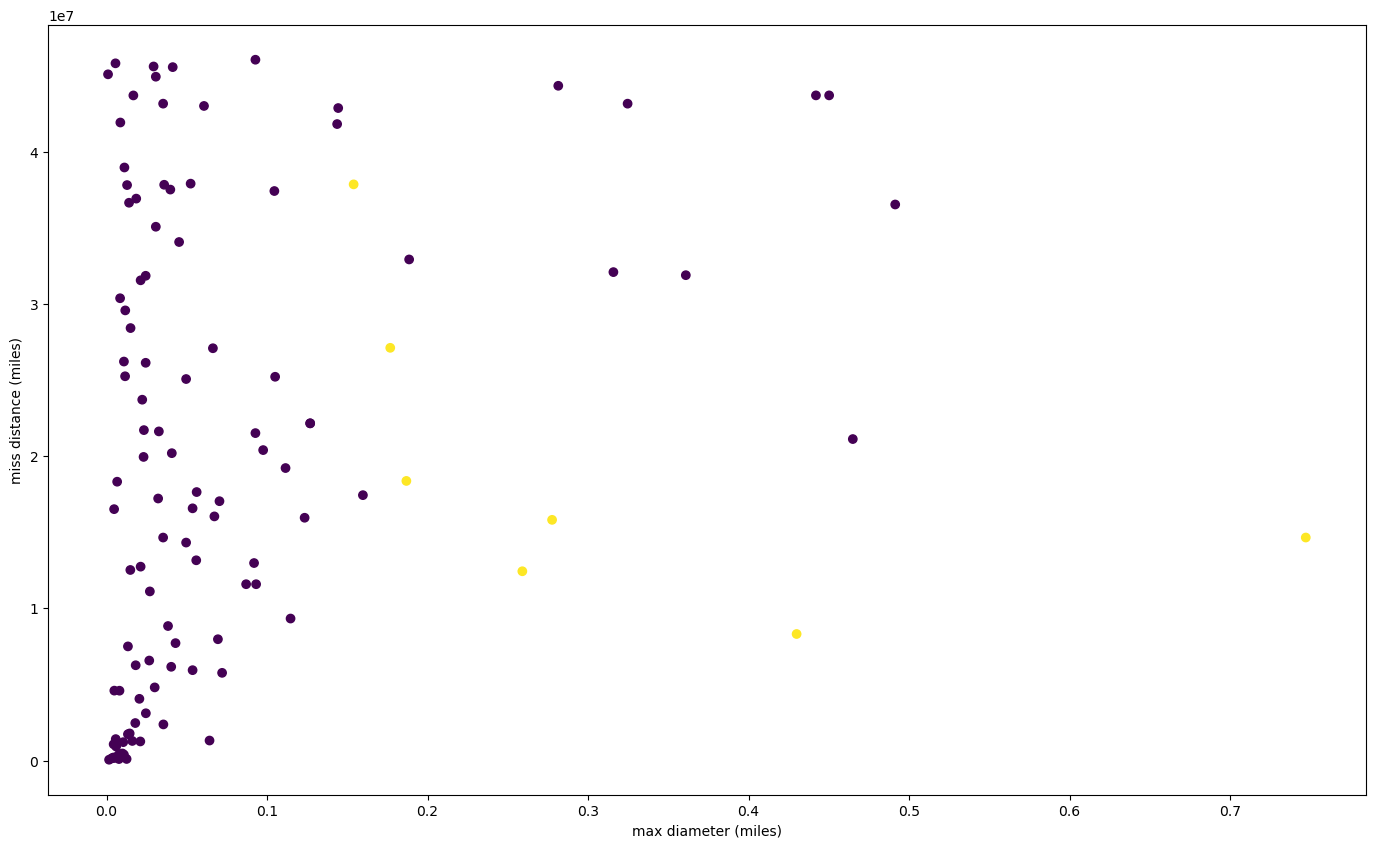

In [25]:
max_diam = []
hazardous = []
miss_dist = []
for day, objs in res['near_earth_objects'].items():
    for obj in objs:
        max_diam.append(float(obj['estimated_diameter']['miles']['estimated_diameter_max']))
        hazardous.append(obj['is_potentially_hazardous_asteroid'])
        miss_dist.append(float(obj['close_approach_data'][0]['miss_distance']['miles']))

plt.figure(figsize = (17, 10))
plt.scatter(max_diam, miss_dist, c = hazardous)
plt.xlabel('max diameter (miles)')
plt.ylabel('miss distance (miles)');

If you want to work with the response from an API using _pandas_, you'll want to convert it to a DataFrame. In some circumstances, you can easily convert a json to a DataFrame, but in other cases, you have to do a little bit of work.

In [26]:
import pandas as pd

The easiest case is when you have a list of dictionaries. Here, you can simply use the `DataFrame` constructor. Let's see how this works using one of the days. If you wanted to get all of the results into a single DataFrame, you could iterate through and concatenate. 

In [27]:
pd.DataFrame(response.json()['near_earth_objects']['2022-01-07']).head(2)

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,sentry_data
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,{'kilometers': {'estimated_diameter_min': 0.18...,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,NaN
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,{'kilometers': {'estimated_diameter_min': 0.30...,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,NaN


You'll notice that we still have dictionaries in some of the columns. This can be remedied using the `json_normalize` function.

In [28]:
pd.json_normalize(response.json()['near_earth_objects']['2022-01-07']).head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max,sentry_data
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,186.446818,416.90776,0.115853,0.259054,611.702179,1367.807655,NaN
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,309.424699,691.89466,0.192268,0.429923,1015.172928,2269.995676,NaN


This almost does it, but the `close_approach_data` column contains a list, which `json_normalize` can't handle. To fix this, we can use the `explode` method which will unpack the list across multiple columns, if needed.

In [29]:
response_df = pd.json_normalize(response.json()['near_earth_objects']['2022-01-07'])
response_df.explode('close_approach_data').head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max,sentry_data
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,"{'close_approach_date': '2022-01-07', 'close_a...",False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,186.446818,416.90776,0.115853,0.259054,611.702179,1367.807655,NaN
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,"{'close_approach_date': '2022-01-07', 'close_a...",False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,309.424699,691.89466,0.192268,0.429923,1015.172928,2269.995676,NaN


Once exploded, you can use the `json_normalize` function again.

In [30]:
pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data']).head(2)

,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
0,2022-01-07,2022-Jan-07 12:09,1641557340000,Earth,10.0478001196,36172.0804304837,22475.9240874858,0.1338706738,52.0756921082,20026767.655944806,12444056.3828420828
1,2022-01-07,2022-Jan-07 02:07,1641521220000,Earth,16.7624360583,60344.7698097014,37495.8932187003,0.0895472705,34.8338882245,13396080.931113835,8323938.704427523


And finally, you can concatenate the two pieces together.

In [31]:
pd.concat([
    response_df.explode('close_approach_data').drop(columns = ['close_approach_data']),
    pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data'])
], axis = 1).head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,...,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,...,2022-Jan-07 12:09,1641557340000,Earth,10.0478001196,36172.0804304837,22475.9240874858,0.1338706738,52.0756921082,20026767.655944806,12444056.3828420828
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,...,2022-Jan-07 02:07,1641521220000,Earth,16.7624360583,60344.7698097014,37495.8932187003,0.0895472705,34.8338882245,13396080.931113835,8323938.704427523


Let's try another `endpoint` from NASA. This time copy the endpoint from the **APOD** (Astronomy Picture of the Day) section.

Fill in the endpoint and parameters in order to retrieve the image for January 1, 2019.

In [32]:
endpoint = 'https://api.nasa.gov/planetary/apod'

params = {
    'date': '2019-01-01',
    'api_key': api_key
}

In [33]:
response = requests.get(endpoint, params = params)

In [34]:
response

<Response [200]>

In [35]:
response.json()

{'date': '2019-01-01',
 'explanation': "This floating ring is the size of a galaxy.  In fact, it is a galaxy -- or at least part of one: the photogenic Sombrero Galaxy, one of the largest galaxies in the nearby Virgo Cluster of Galaxies.  The dark band of dust that obscures the mid-section of the Sombrero Galaxy in optical light actually glows brightly in infrared light.  The featured image, digitally sharpened, shows the infrared glow, recently recorded by the orbiting Spitzer Space Telescope, superposed in false-color on an existing image taken by NASA's Hubble Space Telescope in optical light. The Sombrero Galaxy, also known as M104, spans about 50,000 light years across and lies 28 million light years away.  M104 can be seen with a small telescope in the direction of the constellation Virgo.   News: New Horizons Spacecraft Passes Ultima Thule",
 'hdurl': 'https://apod.nasa.gov/apod/image/1901/sombrero_spitzer_3000.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'T

Finally, let's grab the image url so that we can retrieve the actual image.

In [36]:
image_response = requests.get(response.json()['url'])

For image responses, we don't want to look at the text or json, but instead take the content. We'll now use the `.content` attribute from the response to render an image.

In [37]:
from IPython.display import Image

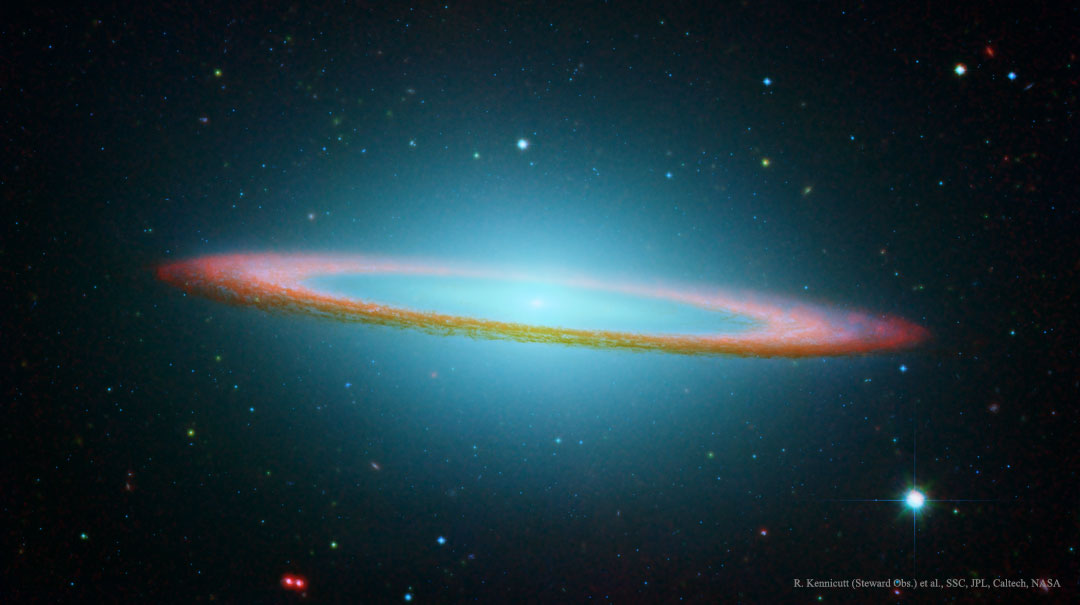

In [38]:
Image(image_response.content)